**Esquemas:** definen el nombre de la columna y el tipo de datos que contiene.  Se pueden definir previamente antes de leer los datos o que el programa lo genere automaticamente.     
Tanto en Scala como en Python los esquemas devuelven: nombre de la columna, tipo de dato, un booleano que indica si puede contener nulos o no.     


Cada **fila** de un DataFrame es un registro que Spark almacena como objeto tipo fila ("Row"). Cuando creas una nueva fila para un DF, tienes que introducir los valores en el mismo orden que estén en el esquema de los datos.

**Transformaciones de los DataFrames**     
- Añadir filas o columnas.
- Borrar filas o columnas.
- Se puede transformar una fila en una columna o viceversa.
- Podemos cambiar el orden de las filas basandonos en el valor de las columnas.
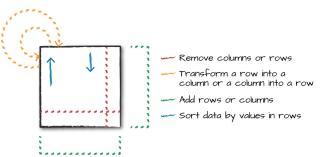

**Concatenar o unir DataFrames**     
Para poder concatenar o unir dos Dataframes tienes que unir el original con uno nuevo. Ambos deben tener el mismo esquema y el mismo numero de columnas, si no no va a funcionar. Las nuevas filas se añadiran al final del DF.

**Funciones para ordenar las filas**    
Podemos utilizar las funciones asc_nulls_first, desc_nulls_first, asc_nulls_last o desc_nulls_last para indicar el lugar donde se quiere que aparezcan los valores nulos en el DF ordenado.

### SCALA

In [1]:
val df = spark.read.format("json").load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json")

Intitializing Scala interpreter ...

Spark Web UI available at http://EM2021002836.bosonit.local:4041
SparkContext available as 'sc' (version = 3.1.1, master = local[*], app id = local-1623741231573)
SparkSession available as 'spark'


df: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [2]:
//Mostramos el esquema que tienen nuestros datos
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [3]:
//Para ver el esquema de un fichero
spark.read.format("json").load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json").schema

res1: org.apache.spark.sql.types.StructType = StructType(StructField(DEST_COUNTRY_NAME,StringType,true), StructField(ORIGIN_COUNTRY_NAME,StringType,true), StructField(count,LongType,true))


Como crear un esquema:

In [4]:
import org.apache.spark.sql.types.{StructField, StructType, StringType, LongType}
import org.apache.spark.sql.types.Metadata

import org.apache.spark.sql.types.{StructField, StructType, StringType, LongType}
import org.apache.spark.sql.types.Metadata


In [5]:
val myManualSchema = StructType(Array(
StructField("DEST_COUNTRY_NAME", StringType, true),
StructField("ORIGIN_COUNTRY_NAME", StringType, true),
StructField("count", LongType, false,
Metadata.fromJson("{\"hello\":\"world\"}"))
))

myManualSchema: org.apache.spark.sql.types.StructType = StructType(StructField(DEST_COUNTRY_NAME,StringType,true), StructField(ORIGIN_COUNTRY_NAME,StringType,true), StructField(count,LongType,false))


In [6]:
val df = spark.read.format("json").schema(myManualSchema).load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json")

df: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


Funciones para ver columnas:

In [7]:
import org.apache.spark.sql.functions.{col, column}

import org.apache.spark.sql.functions.{col, column}


In [8]:
col("someColumnName")

res2: org.apache.spark.sql.Column = someColumnName


In [9]:
column("someColumnName")

res3: org.apache.spark.sql.Column = someColumnName


In [10]:
$"myColumn"

res4: org.apache.spark.sql.ColumnName = myColumn


In [11]:
df.col("count")

res5: org.apache.spark.sql.Column = count


In [12]:
//Para ver las columnas de un fichero
spark.read.format("json").load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json")
.columns

res6: Array[String] = Array(DEST_COUNTRY_NAME, ORIGIN_COUNTRY_NAME, count)


In [13]:
//Mostramos la primera fila del DF
df.first()

res7: org.apache.spark.sql.Row = [United States,Romania,15]


In [14]:
//Crear una fila de forma manual
import org.apache.spark.sql.Row
val myRow = Row("Hello", null, 1, false)

import org.apache.spark.sql.Row
myRow: org.apache.spark.sql.Row = [Hello,null,1,false]


In [15]:
//Para acceder a un elemento de una fila
myRow(0) 

res8: Any = Hello


In [16]:
//Para cambiar el tipo de dato de un elemento de una fila
myRow(0).asInstanceOf[String]

res9: String = Hello


In [17]:
//Para cambiar el tipo de dato de un elemento de una fila
myRow.getString(0)

res10: String = Hello


In [18]:
//Para cambiar el tipo de dato de un elemento de una fila
myRow.getInt(2)

res11: Int = 1


Formas de crear un DataFrame:

In [19]:
val df = spark.read.format("json")
.load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json")
df.createOrReplaceTempView("dfTable")

df: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [20]:
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructField, StructType, StringType, LongType}

import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructField, StructType, StringType, LongType}


In [21]:
val myManualSchema = new StructType(Array(
new StructField("some", StringType, true),
new StructField("col", StringType, true),
new StructField("names", LongType, false)))

myManualSchema: org.apache.spark.sql.types.StructType = StructType(StructField(some,StringType,true), StructField(col,StringType,true), StructField(names,LongType,false))


In [22]:
val myRows = Seq(Row("Hello", null, 1L))
val myRDD = spark.sparkContext.parallelize(myRows)

myRows: Seq[org.apache.spark.sql.Row] = List([Hello,null,1])
myRDD: org.apache.spark.rdd.RDD[org.apache.spark.sql.Row] = ParallelCollectionRDD[19] at parallelize at <console>:32


In [23]:
val myDf = spark.createDataFrame(myRDD, myManualSchema)

myDf: org.apache.spark.sql.DataFrame = [some: string, col: string ... 1 more field]


In [24]:
myDf.show()

+-----+----+-----+
| some| col|names|
+-----+----+-----+
|Hello|null|    1|
+-----+----+-----+



In [25]:
val myDF = Seq(("Hello", 2, 1L)).toDF("col1", "col2", "col3")

myDF: org.apache.spark.sql.DataFrame = [col1: string, col2: int ... 1 more field]


Uso de la función select con DF:

In [26]:
df.select("DEST_COUNTRY_NAME").show(2)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
+-----------------+
only showing top 2 rows



In [27]:
df.select("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME").show(2)

+-----------------+-------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|
+-----------------+-------------------+
|    United States|            Romania|
|    United States|            Croatia|
+-----------------+-------------------+
only showing top 2 rows



In [28]:
import org.apache.spark.sql.functions.{expr, col, column}
df.select(
df.col("DEST_COUNTRY_NAME"),
col("DEST_COUNTRY_NAME"),
column("DEST_COUNTRY_NAME"),
'DEST_COUNTRY_NAME,
$"DEST_COUNTRY_NAME",
expr("DEST_COUNTRY_NAME"))
.show(2)

+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|
+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|    United States|    United States|    United States|    United States|    United States|    United States|
|    United States|    United States|    United States|    United States|    United States|    United States|
+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
only showing top 2 rows



import org.apache.spark.sql.functions.{expr, col, column}


In [29]:
//Para cambiarle el nombre a la columna del resultado
df.select(expr("DEST_COUNTRY_NAME AS destination")).show(2)

+-------------+
|  destination|
+-------------+
|United States|
|United States|
+-------------+
only showing top 2 rows



In [30]:
//Devuelve el nombre de la columna original
df.select(expr("DEST_COUNTRY_NAME as destination").alias("DEST_COUNTRY_NAME"))
.show(2)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
+-----------------+
only showing top 2 rows



In [31]:
df.selectExpr("DEST_COUNTRY_NAME as newColumnName", "DEST_COUNTRY_NAME").show(2)

+-------------+-----------------+
|newColumnName|DEST_COUNTRY_NAME|
+-------------+-----------------+
|United States|    United States|
|United States|    United States|
+-------------+-----------------+
only showing top 2 rows



In [32]:
//Selecciona todas las columnas y añade una nueva que indique si el pais de destino y el de origen es el mismo
df.selectExpr("*","(DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME) as withinCountry").show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [33]:
df.selectExpr("avg(count)", "count(distinct(DEST_COUNTRY_NAME))").show(2)

+-----------+---------------------------------+
| avg(count)|count(DISTINCT DEST_COUNTRY_NAME)|
+-----------+---------------------------------+
|1770.765625|                              132|
+-----------+---------------------------------+



In [34]:
import org.apache.spark.sql.functions.lit
df.select(expr("*"), lit(1).as("One")).show(2)

+-----------------+-------------------+-----+---+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|One|
+-----------------+-------------------+-----+---+
|    United States|            Romania|   15|  1|
|    United States|            Croatia|    1|  1|
+-----------------+-------------------+-----+---+
only showing top 2 rows



import org.apache.spark.sql.functions.lit


Añadir nuevas columnas al DF:

In [35]:
//Añadimos la columna numberOne que contiene una lista de 1s.
df.withColumn("numberOne", lit(1)).show(2)

+-----------------+-------------------+-----+---------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|numberOne|
+-----------------+-------------------+-----+---------+
|    United States|            Romania|   15|        1|
|    United States|            Croatia|    1|        1|
+-----------------+-------------------+-----+---------+
only showing top 2 rows



In [36]:
df.withColumn("withinCountry", expr("ORIGIN_COUNTRY_NAME == DEST_COUNTRY_NAME"))
.show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [37]:
//Para renombrar columnmas: en primer lugar ponemos como se llama y en segundo el nombre al que la quieres cambiar
df.withColumnRenamed("DEST_COUNTRY_NAME", "dest").columns

res25: Array[String] = Array(dest, ORIGIN_COUNTRY_NAME, count)


In [38]:
//Añadir una columna nueva, con un nombre largo que incluya espacios
import org.apache.spark.sql.functions.expr
val dfWithLongColName = df.withColumn(
"This Long Column-Name",
expr("ORIGIN_COUNTRY_NAME"))

import org.apache.spark.sql.functions.expr
dfWithLongColName: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 2 more fields]


In [39]:
//Cuando queremos llamar a una columna que tiene espacios en su nombre, tenemos que poner el nombre de la columna entre ''
dfWithLongColName.selectExpr(
"`This Long Column-Name`",
"`This Long Column-Name` as `new col`")
.show(2)

+---------------------+-------+
|This Long Column-Name|new col|
+---------------------+-------+
|              Romania|Romania|
|              Croatia|Croatia|
+---------------------+-------+
only showing top 2 rows



In [40]:
//Otro ejemplo
dfWithLongColName.select(col("This Long Column-Name")).columns

res27: Array[String] = Array(This Long Column-Name)


Para borrar una columna o varias:

In [41]:
df.drop("ORIGIN_COUNTRY_NAME").columns

res28: Array[String] = Array(DEST_COUNTRY_NAME, count)


In [42]:
dfWithLongColName.drop("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME")

res29: org.apache.spark.sql.DataFrame = [count: bigint, This Long Column-Name: string]


In [43]:
//Para cambiar el tipo de datos de una columna
df.withColumn("count2", col("count").cast("long"))

res30: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 2 more fields]


Ejemplos filtrado de columnas:

In [44]:
df.filter(col("count") < 2).show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



In [45]:
df.where("count < 2").show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



In [46]:
df.where(col("count") < 2).where(col("ORIGIN_COUNTRY_NAME") =!= "Croatia").show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|          Singapore|    1|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



Filas unicas:

In [47]:
df.select("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME").distinct().count()

res34: Long = 256


In [48]:
df.select("ORIGIN_COUNTRY_NAME").distinct().count()

res35: Long = 125


Para obtener una muestra aleatoria de nuestra base de datos:

In [49]:
val seed = 5
val withReplacement = false
val fraction = 0.5
df.sample(withReplacement, fraction, seed).count()

seed: Int = 5
withReplacement: Boolean = false
fraction: Double = 0.5
res36: Long = 138


Para splitear la base de datos en train y test (hay que especificar que porcentaje de datos queremos darle a cada una). Tiene que devolver false la condicion.

In [50]:
val dataFrames = df.randomSplit(Array(0.25, 0.75), seed)
dataFrames(0).count() > dataFrames(1).count()

dataFrames: Array[org.apache.spark.sql.Dataset[org.apache.spark.sql.Row]] = Array([DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field], [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field])
res37: Boolean = false


Union de DataFrames: filas

In [51]:
import org.apache.spark.sql.Row
val schema = df.schema
val newRows = Seq(
Row("New Country", "Other Country", 5),
Row("New Country 2", "Other Country 3", 1)
)

import org.apache.spark.sql.Row
schema: org.apache.spark.sql.types.StructType = StructType(StructField(DEST_COUNTRY_NAME,StringType,true), StructField(ORIGIN_COUNTRY_NAME,StringType,true), StructField(count,LongType,true))
newRows: Seq[org.apache.spark.sql.Row] = List([New Country,Other Country,5], [New Country 2,Other Country 3,1])


In [52]:
val parallelizedRows = spark.sparkContext.parallelize(newRows)
val newDF = spark.createDataFrame(parallelizedRows, schema)

parallelizedRows: org.apache.spark.rdd.RDD[org.apache.spark.sql.Row] = ParallelCollectionRDD[127] at parallelize at <console>:39
newDF: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [53]:
df.union(newDF)
.where("count = 1")
.where($"ORIGIN_COUNTRY_NAME" =!= "United States").show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
|    United States|          Gibraltar|    1|
|    United States|             Cyprus|    1|
|    United States|            Estonia|    1|
|    United States|          Lithuania|    1|
|    United States|           Bulgaria|    1|
|    United States|            Georgia|    1|
|    United States|            Bahrain|    1|
|    United States|   Papua New Guinea|    1|
+-----------------+-------------------+-----+
only showing top 10 rows



Ordenar DFs:

In [54]:
df.sort("count").show(5)

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|               Malta|      United States|    1|
|Saint Vincent and...|      United States|    1|
|       United States|            Croatia|    1|
|       United States|          Gibraltar|    1|
|       United States|          Singapore|    1|
+--------------------+-------------------+-----+
only showing top 5 rows



In [55]:
df.orderBy("count", "DEST_COUNTRY_NAME").show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|     Burkina Faso|      United States|    1|
|    Cote d'Ivoire|      United States|    1|
|           Cyprus|      United States|    1|
|         Djibouti|      United States|    1|
|        Indonesia|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



In [56]:
df.orderBy(col("count"), col("DEST_COUNTRY_NAME")).show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|     Burkina Faso|      United States|    1|
|    Cote d'Ivoire|      United States|    1|
|           Cyprus|      United States|    1|
|         Djibouti|      United States|    1|
|        Indonesia|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



In [57]:
import org.apache.spark.sql.functions.{desc, asc}
df.orderBy(expr("count desc")).show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|          Moldova|      United States|    1|
|    United States|            Croatia|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



import org.apache.spark.sql.functions.{desc, asc}


In [58]:
df.orderBy(desc("count"), asc("DEST_COUNTRY_NAME")).show(2)


+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|             Canada|  8483|
+-----------------+-------------------+------+
only showing top 2 rows



Funcion para limitar el numero de filas que se muestran por pantalla:

In [59]:
df.limit(5).show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+



In [60]:
df.orderBy(expr("count desc")).limit(6).show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|               Malta|      United States|    1|
|Saint Vincent and...|      United States|    1|
|       United States|            Croatia|    1|
|       United States|          Gibraltar|    1|
|       United States|          Singapore|    1|
|             Moldova|      United States|    1|
+--------------------+-------------------+-----+



Particiones:

In [61]:
//Ver el numero de particiones que hay
df.rdd.getNumPartitions

res46: Int = 1


In [62]:
//Cambiar el numero de particiones
df.repartition(5)

res47: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [63]:
//Establecer el numero de particiones en base a una columna
df.repartition(col("DEST_COUNTRY_NAME"))

res48: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [64]:
df.repartition(5, col("DEST_COUNTRY_NAME"))

res49: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [65]:
//Coalesce
df.repartition(5, col("DEST_COUNTRY_NAME")).coalesce(2)

res50: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


Funciones para mostrar por pantalla:

In [66]:
val collectDF = df.limit(10)


collectDF: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [67]:
collectDF.take(5)

res51: Array[org.apache.spark.sql.Row] = Array([United States,Romania,15], [United States,Croatia,1], [United States,Ireland,344], [Egypt,United States,15], [United States,India,62])


In [68]:
collectDF.show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+



In [69]:
collectDF.show(5, false)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|United States    |Romania            |15   |
|United States    |Croatia            |1    |
|United States    |Ireland            |344  |
|Egypt            |United States      |15   |
|United States    |India              |62   |
+-----------------+-------------------+-----+
only showing top 5 rows



In [70]:
collectDF.collect()

res54: Array[org.apache.spark.sql.Row] = Array([United States,Romania,15], [United States,Croatia,1], [United States,Ireland,344], [Egypt,United States,15], [United States,India,62], [United States,Singapore,1], [United States,Grenada,62], [Costa Rica,United States,588], [Senegal,United States,40], [Moldova,United States,1])


In [71]:
//Para coleccionar filas en el Driver
collectDF.toLocalIterator()

res55: java.util.Iterator[org.apache.spark.sql.Row] = IteratorWrapper(<iterator>)


### PYTHON

In [1]:
df = spark.read.format("json").load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json")

In [2]:
##Para ver el esquema de nuestra variable
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [3]:
##Para ver el esquema de un fichero
spark.read.format("json").load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json").schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

Como crear un esquema:

In [4]:
from pyspark.sql.types import StructField, StructType, StringType, LongType

In [5]:
myManualSchema = StructType([
StructField("DEST_COUNTRY_NAME", StringType(), True),
StructField("ORIGIN_COUNTRY_NAME", StringType(), True),
StructField("count", LongType(), False, metadata={"hello":"world"})
])

In [6]:
df = spark.read.format("json").schema(myManualSchema).load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json")

Funciones para ver columnas:

In [7]:
from pyspark.sql.functions import col, column

In [8]:
col("someColumnName")

Column<'someColumnName'>

In [9]:
df.count

<bound method DataFrame.count of DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]>

In [10]:
##Para ver las columnas de un fichero
spark.read.format("json").load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json").columns

['DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME', 'count']

In [11]:
##Mostramos la primera fila del DF
df.first()

Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15)

In [12]:
##Crear una fila de forma manual
from pyspark.sql import Row
myRow = Row("Hello", None, 1, False)

In [13]:
##Acceder al elemento 1 de la lista
myRow[0]

'Hello'

In [14]:
##Acceder al elemento 3 de la lista
myRow[2]

1

Formas de crear un DataFrame:

In [15]:
df = spark.read.format("json").load("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.json")
df.createOrReplaceTempView("dfTable")

In [16]:
from pyspark.sql import Row
from pyspark.sql.types import StructField, StructType, StringType, LongType

In [17]:
myManualSchema = StructType([
StructField("some", StringType(), True),
StructField("col", StringType(), True),
StructField("names", LongType(), False)
])

In [18]:
myRow = Row("Hello", None, 1)

In [19]:
myDf = spark.createDataFrame([myRow], myManualSchema)

In [20]:
myDf.show()

+-----+----+-----+
| some| col|names|
+-----+----+-----+
|Hello|null|    1|
+-----+----+-----+



Uso de la función Select con DF:

In [21]:
df.select("DEST_COUNTRY_NAME").show(2)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
+-----------------+
only showing top 2 rows



In [22]:
df.select("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME").show(2)

+-----------------+-------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|
+-----------------+-------------------+
|    United States|            Romania|
|    United States|            Croatia|
+-----------------+-------------------+
only showing top 2 rows



In [27]:
from pyspark.sql.functions import expr, col, column
df.select(
expr("DEST_COUNTRY_NAME"),
col("DEST_COUNTRY_NAME"))\
.show(2)

+-----------------+-----------------+
|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|
+-----------------+-----------------+
|    United States|    United States|
|    United States|    United States|
+-----------------+-----------------+
only showing top 2 rows



In [25]:
##Para cambiarle el nombre a la columna del resultado
df.select(expr("DEST_COUNTRY_NAME AS destination")).show(2)

+-------------+
|  destination|
+-------------+
|United States|
|United States|
+-------------+
only showing top 2 rows



In [28]:
##Devuelve el nombre de la columna original
df.select(expr("DEST_COUNTRY_NAME as destination").alias("DEST_COUNTRY_NAME"))\
.show(2)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
+-----------------+
only showing top 2 rows



In [29]:
df.selectExpr("DEST_COUNTRY_NAME as newColumnName", "DEST_COUNTRY_NAME").show(2)

+-------------+-----------------+
|newColumnName|DEST_COUNTRY_NAME|
+-------------+-----------------+
|United States|    United States|
|United States|    United States|
+-------------+-----------------+
only showing top 2 rows



In [30]:
##Selecciona todas las columnas y añade una nueva que indique si el pais de destino y el de origen es el mismo
df.selectExpr("*", "(DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME) as withinCountry").show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [31]:
df.selectExpr("avg(count)", "count(distinct(DEST_COUNTRY_NAME))").show(2)

+-----------+---------------------------------+
| avg(count)|count(DISTINCT DEST_COUNTRY_NAME)|
+-----------+---------------------------------+
|1770.765625|                              132|
+-----------+---------------------------------+



In [32]:
##Literaks
from pyspark.sql.functions import lit
df.select(expr("*"), lit(1).alias("One")).show(2)

+-----------------+-------------------+-----+---+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|One|
+-----------------+-------------------+-----+---+
|    United States|            Romania|   15|  1|
|    United States|            Croatia|    1|  1|
+-----------------+-------------------+-----+---+
only showing top 2 rows



Añadir columnas nuevas al DF:

In [33]:
##Añadimos la columna numberOne que contiene una lista de 1s.
df.withColumn("numberOne", lit(1)).show(2)b

SyntaxError: invalid syntax (<ipython-input-33-aefb0ba646cf>, line 2)

In [34]:
df.withColumn("withinCountry", expr("ORIGIN_COUNTRY_NAME == DEST_COUNTRY_NAME"))\
.show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [35]:
#Para renombrar columnmas: en primer lugar ponemos como se llama y en segundo el nombre al que la quieres cambiar
df.withColumnRenamed("DEST_COUNTRY_NAME", "dest").columns

['dest', 'ORIGIN_COUNTRY_NAME', 'count']

In [36]:
from pyspark.sql.functions import expr
#Añadir una columna nueva, con un nombre largo que incluya espacios
dfWithLongColName = df.withColumn(
"This Long Column-Name",
expr("ORIGIN_COUNTRY_NAME"))

In [37]:
##Cuando queremos llamar a una columna que tiene espacios en su nombre, tenemos que poner el nombre de la columna entre ''
dfWithLongColName.selectExpr(
"`This Long Column-Name`",
"`This Long Column-Name` as `new col`")\
.show(2)
dfWithLongColName.createOrReplaceTempView("dfTableLong")

+---------------------+-------+
|This Long Column-Name|new col|
+---------------------+-------+
|              Romania|Romania|
|              Croatia|Croatia|
+---------------------+-------+
only showing top 2 rows



In [38]:
##Otro ejemplo
dfWithLongColName.select(expr("`This Long Column-Name`")).columns

['This Long Column-Name']

Para borrar una columna o varias:

In [39]:
df.drop("ORIGIN_COUNTRY_NAME").columns

['DEST_COUNTRY_NAME', 'count']

In [40]:
dfWithLongColName.drop("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME")

DataFrame[count: bigint, This Long Column-Name: string]

In [41]:
from pyspark.sql.functions import *
##Para cambiar el tipo de datos de una columna
df.withColumn("count2", col("count").cast("long"))

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint, count2: bigint]

Ejemplos filtrado de columnas:

In [42]:
df.filter(col("count") < 2).show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



In [43]:
df.where("count < 2").show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



In [44]:
df.where(col("count") < 2).where(col("ORIGIN_COUNTRY_NAME") != "Croatia").show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|          Singapore|    1|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



Filas unicas:

In [45]:
df.select("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME").distinct().count()

256

In [46]:
df.select("ORIGIN_COUNTRY_NAME").distinct().count()

125

Para obtener una muestra aleatoria de nuestra base de datos:

In [47]:
seed = 5
withReplacement = False
fraction = 0.5
df.sample(withReplacement, fraction, seed).count()

138

Para splitear la base de datos en train y test (hay que especificar que porcentaje de datos queremos darle a cada una). Tiene que devolver false la condicion.

In [48]:
dataFrames = df.randomSplit([0.25, 0.75], seed)
dataFrames[0].count() > dataFrames[1].count()

False

Union de DataFrames: filas

In [49]:
from pyspark.sql import Row
schema = df.schema
newRows = [
Row("New Country", "Other Country", 5),
Row("New Country 2", "Other Country 3", 1)
]

In [50]:
parallelizedRows = spark.sparkContext.parallelize(newRows)
newDF = spark.createDataFrame(parallelizedRows, schema)

In [51]:
df.union(newDF)\
.where("count = 1")\
.where(col("ORIGIN_COUNTRY_NAME") != "United States")\
.show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
|    United States|          Gibraltar|    1|
|    United States|             Cyprus|    1|
|    United States|            Estonia|    1|
|    United States|          Lithuania|    1|
|    United States|           Bulgaria|    1|
|    United States|            Georgia|    1|
|    United States|            Bahrain|    1|
|    United States|   Papua New Guinea|    1|
|    United States|         Montenegro|    1|
|    United States|            Namibia|    1|
|    New Country 2|    Other Country 3|    1|
+-----------------+-------------------+-----+



Ordenar columnas:

In [52]:
df.sort("count").show(5)

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|               Malta|      United States|    1|
|Saint Vincent and...|      United States|    1|
|       United States|            Croatia|    1|
|       United States|          Gibraltar|    1|
|       United States|          Singapore|    1|
+--------------------+-------------------+-----+
only showing top 5 rows



In [53]:
df.orderBy("count", "DEST_COUNTRY_NAME").show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|     Burkina Faso|      United States|    1|
|    Cote d'Ivoire|      United States|    1|
|           Cyprus|      United States|    1|
|         Djibouti|      United States|    1|
|        Indonesia|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



In [54]:
df.orderBy(col("count"), col("DEST_COUNTRY_NAME")).show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|     Burkina Faso|      United States|    1|
|    Cote d'Ivoire|      United States|    1|
|           Cyprus|      United States|    1|
|         Djibouti|      United States|    1|
|        Indonesia|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



In [55]:
from pyspark.sql.functions import desc, asc
df.orderBy(expr("count desc")).show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|          Moldova|      United States|    1|
|    United States|            Croatia|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



In [56]:
df.orderBy(col("count").desc(), col("DEST_COUNTRY_NAME").asc()).show(2)

+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|             Canada|  8483|
+-----------------+-------------------+------+
only showing top 2 rows



Funcion para limitar el numero de filas que se muestran por pantalla:

In [57]:
df.limit(5).show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+



In [58]:
df.limit(5).show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+



Particiones:

In [59]:
##Obtener el numero de particiones
df.rdd.getNumPartitions()

1

In [60]:
##Cambiar el numero de particiones
df.repartition(5)

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

In [61]:
##Cambiar el numero de particiones en base al numero de la columna
df.repartition(col("DEST_COUNTRY_NAME"))

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

In [62]:
df.repartition(5, col("DEST_COUNTRY_NAME"))

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

Coalesce: trata de combinar particiones.

In [63]:
df.repartition(5, col("DEST_COUNTRY_NAME")).coalesce(2)

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

Funciones para mostrar por pantalla:

In [64]:
collectDF = df.limit(10)

In [65]:
collectDF.take(5)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62)]

In [66]:
collectDF.show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+



In [67]:
collectDF.show(5, False)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|United States    |Romania            |15   |
|United States    |Croatia            |1    |
|United States    |Ireland            |344  |
|Egypt            |United States      |15   |
|United States    |India              |62   |
+-----------------+-------------------+-----+
only showing top 5 rows



In [68]:
collectDF.collect()

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Singapore', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Grenada', count=62),
 Row(DEST_COUNTRY_NAME='Costa Rica', ORIGIN_COUNTRY_NAME='United States', count=588),
 Row(DEST_COUNTRY_NAME='Senegal', ORIGIN_COUNTRY_NAME='United States', count=40),
 Row(DEST_COUNTRY_NAME='Moldova', ORIGIN_COUNTRY_NAME='United States', count=1)]

In [69]:
##Para coleccionar filas en el Driver
collectDF.toLocalIterator()

<generator object _local_iterator_from_socket.<locals>.PyLocalIterable.__iter__ at 0x000002B220CB1F20>